# SPL Open Data Usage

Welcome to the MLSE Sport Performance Lab (SPL) Open data repository! See below for a quick explanation on how best to load into this data into a notebook and do some basic visualization.

### File structure

Assuming that you have cloned the repository, the naming convention of the files is as follows. The data in this repository is structured in the following tree:

```
[sport]/
├─ [action_type]/
│  ├─ participant_information.json
│  ├─ [participant_id]/
│  │  ├─ trial_data/
|  |     ├─ [trial_id].json
```

where, trial data is unique to each individual participant and anonymized, demographic information relating to all participants is referenced in the `participant_information.json` file.

In this notebook, we will investigate how to load and work with the basketball free throw data from participant ```P0001```.

### Import Packages

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from animate import animate_trial

### Free throw data 

The free throws are divided into "trials" which each contain a single free throw. These were captured using SPL's internal motion capture setup, and are provided at a frame rate of 30fps. They contain 25 body-pose keypoints corresponding to the participant, as well as a limited amount of ball data, from the initial dribbles to shortly after release. To open a particular free throw trial, we can use the `json` library in python:

In [2]:
for trial_number in range(1,126):

    trial_id = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_id}.json') as json_file:
        free_throw_data = json.load(json_file)
        break

We can then print the results of ```free_throw_data``` to see its contents:

In [3]:
free_throw_data

{'participant_id': 'P0001',
 'trial_id': 'T0001',
 'result': 'missed',
 'landing_x': 7.15,
 'landing_y': 12.755,
 'entry_angle': 40.9,
 'tracking': [{'frame': 0,
   'time': 0,
   'data': {'ball': [nan, nan, nan],
    'player': {'R_EYE': [26.339, 1.389, 5.521],
     'L_EYE': [26.312, 1.521, 5.522],
     'NOSE': [26.37, 1.48, 5.41],
     'R_EAR': [26.016, 1.134, 5.477],
     'L_EAR': [26.07, 1.586, 5.497],
     'R_SHOULDER': [25.784, 0.837, 4.782],
     'L_SHOULDER': [26.197, 1.812, 4.825],
     'R_ELBOW': [25.802, 0.666, 3.857],
     'L_ELBOW': [26.382, 1.904, 3.856],
     'R_WRIST': [26.169, 0.576, 3.1],
     'L_WRIST': [26.732, 1.817, 3.021],
     'R_HIP': [25.872, 1.032, 3.056],
     'L_HIP': [26.127, 1.671, 3.05],
     'R_KNEE': [25.879, 1.024, 1.74],
     'L_KNEE': [26.145, 1.581, 1.667],
     'R_ANKLE': [25.788, 1.039, 0.427],
     'L_ANKLE': [26.061, 1.578, 0.351],
     'R_1STFINGER': [26.334, 0.689, 2.957],
     'R_5THFINGER': [26.368, 0.691, 2.866],
     'L_1STFINGER': [26.74, 

The `json` contains shot metadata and a list of dictionaries, where each dictionary of the list corresponds to a single frame of data. The keys of the dictionary are as follows:
1. `frame`: The frame number, starting from 0.
2. `time`: The time in milliseconds, since the beginning of the trial. Since the frame rate is 30fps, the difference between subsequent frames' times will be 33 or 34 milliseconds (due to rounding).
3. `landing_x`: Landing position x coordinate on hoop plane.
4. `landing_y`: Landing position y coordinate on hoop plane.
5. `entry_angle`: Angle at which ball breaks (enters) hoop plane.
6. `tracking`: A dictionary that contains the following `xyz` data corresponding to the frame:
   1. `ball`: The `x`, `y`, and `z` coordinates of the ball center. 
   2. `player`: A dictionary containing `x`, `y`, and `z` coordinates for all of the person's keypoints. Each key in this dictionary corresponds to a specific keypoint.  

### Animating A Free Throw

To visualize what this data look like, we can use the animate_trial() function in animate.py. This creates a 3D animation of the free throw data provided with fully customizable views and arguments.

mplbasketball not installed. Cannot show court.


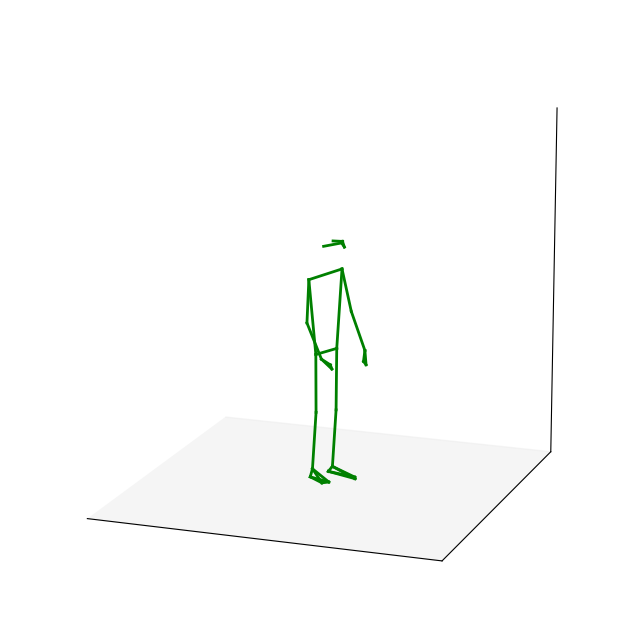

In [4]:
animate_trial(f'./data/P0001/BB_FT_P0001_T0001.json', azim=290, player_color='green')

Let's start looking at all 125 trials now instead of just focusing on one, what are some research questions we can ask using this data?

### Plotting Ball Landing Positions

One of the neat things we can do with our data is plot the ball landing positions for each shot. Let's make some histograms to show the distributions of these landing positions.

Text(0.5, 1.0, 'Landing Y Position Distribution')

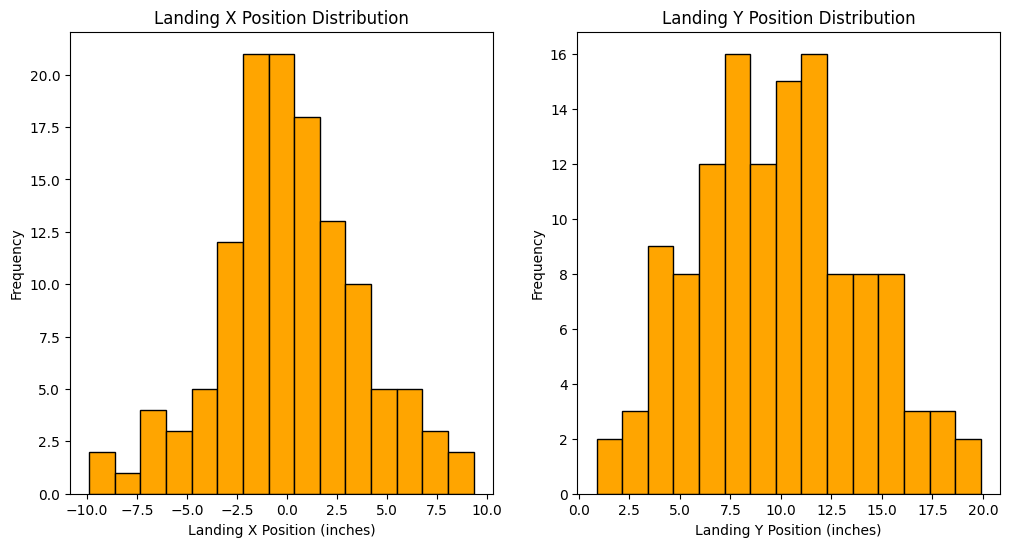

In [5]:
landing_x = []
landing_y = []

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

for trial_number in range(1,126):

    trial_id = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_id}.json') as json_file:
        free_throw_data = json.load(json_file)
    
    landing_x.append(free_throw_data['landing_x'])
    landing_y.append(free_throw_data['landing_y'])

ax[0].hist(landing_x, bins=15, color='orange', edgecolor='black')
ax[0].set_xlabel('Landing X Position (inches)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Landing X Position Distribution')

ax[1].hist(landing_y, bins=15, color='orange', edgecolor='black')
ax[1].set_xlabel('Landing Y Position (inches)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Landing Y Position Distribution')

We can also plot the ball landing positions on top of where we know the rim of the basketball hoop is. This can help determine if the participant has a bias either to the left/right of the rim or shoots the ball too short/too long:

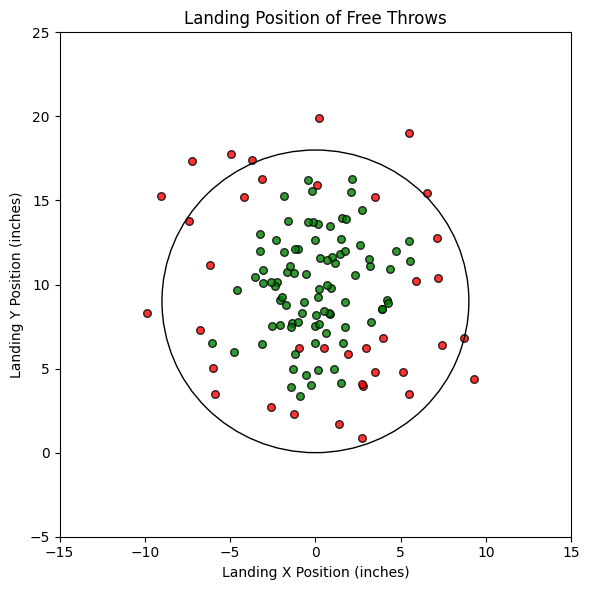

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

for trial_number in range(1,126):

    trial_id = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_id}.json') as json_file:
        free_throw_data = json.load(json_file)
    
    color = 'green' if free_throw_data['result'] == 'made' else 'red'
    ax.scatter(free_throw_data['landing_x'], free_throw_data['landing_y'], color=color, alpha=0.8, edgecolors='black', s=30)

circle = plt.Circle((0, 9), 9, color='black', fill=False)
ax.add_artist(circle)

plt.xlim([-15,15])
plt.ylim([-5,25])
plt.xlabel('Landing X Position (inches)')
plt.ylabel('Landing Y Position (inches)')
plt.title('Landing Position of Free Throws')

plt.tight_layout()
plt.show()


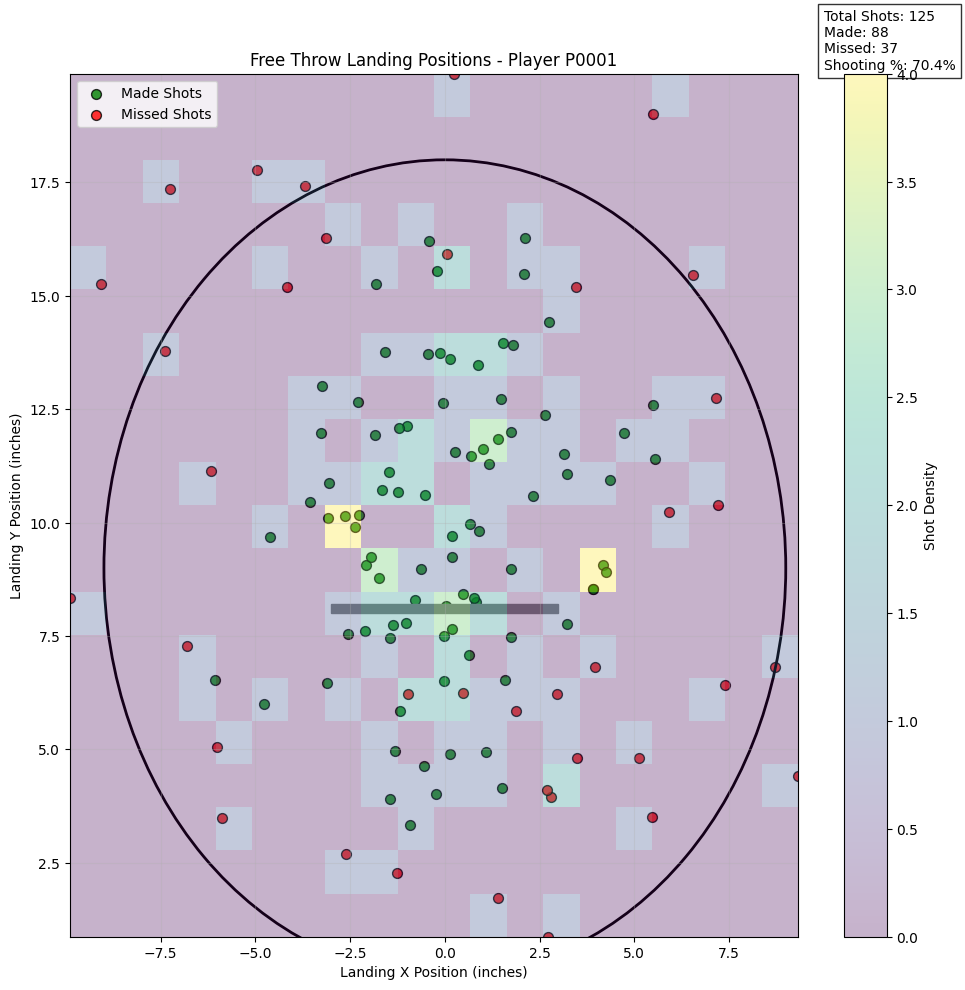

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
from matplotlib.patches import Circle, Rectangle

def visualize_free_throws(player_id, n_trials):
    # Create figure
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Track makes/misses for statistics
    makes = []
    misses = []
    
    # Process each trial
    for trial_number in range(1, n_trials + 1):
        trial_id = str(trial_number).zfill(4)
        
        # Load trial data
        try:
            with open(f'./data/P0001/BB_FT_P0001_T{trial_id}.json') as json_file:
                free_throw_data = json.load(json_file)
            
            # Store landing position based on result
            if free_throw_data['result'] == 'made':
                makes.append((free_throw_data['landing_x'], free_throw_data['landing_y']))
            else:
                misses.append((free_throw_data['landing_x'], free_throw_data['landing_y']))
                
        except FileNotFoundError:
            print(f"Trial {trial_id} not found")
            continue
    
    # Convert to numpy arrays for easier manipulation
    makes = np.array(makes)
    misses = np.array(misses)
    
    # Plot makes and misses
    if len(makes) > 0:
        ax.scatter(makes[:,0], makes[:,1], color='green', alpha=0.8, 
                  edgecolors='black', s=50, label='Made Shots')
    if len(misses) > 0:
        ax.scatter(misses[:,0], misses[:,1], color='red', alpha=0.8, 
                  edgecolors='black', s=50, label='Missed Shots')
    
    # Add court elements
    # Hoop
    circle = Circle((0, 9), 9, color='black', fill=False, linewidth=2)
    ax.add_artist(circle)
    
    # Backboard (simplified)
    backboard = Rectangle((-3, 8), 6, 0.2, color='gray')
    ax.add_artist(backboard)
    
    # Calculate and display statistics
    total_shots = len(makes) + len(misses)
    shooting_pct = (len(makes) / total_shots * 100) if total_shots > 0 else 0
    
    # Add statistics text
    stats_text = f'Total Shots: {total_shots}\n'
    stats_text += f'Made: {len(makes)}\n'
    stats_text += f'Missed: {len(misses)}\n'
    stats_text += f'Shooting %: {shooting_pct:.1f}%'
    
    plt.text(10, 20, stats_text, bbox=dict(facecolor='white', alpha=0.8))
    
    # Set plot parameters
    plt.xlim([-15,15])
    plt.ylim([-5,25])
    plt.xlabel('Landing X Position (inches)')
    plt.ylabel('Landing Y Position (inches)')
    plt.title(f'Free Throw Landing Positions - Player {player_id}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add shot density heatmap
    if len(makes) + len(misses) > 0:
        all_shots = np.vstack([makes, misses]) if len(makes) > 0 and len(misses) > 0 else makes if len(makes) > 0 else misses
        heatmap = ax.hist2d(all_shots[:,0], all_shots[:,1], 
                           bins=20, alpha=0.3, cmap='viridis')
        plt.colorbar(heatmap[3], label='Shot Density')
    
    plt.tight_layout()
    return fig, ax

# Example usage
fig, ax = visualize_free_throws('P0001', 125)
plt.show()

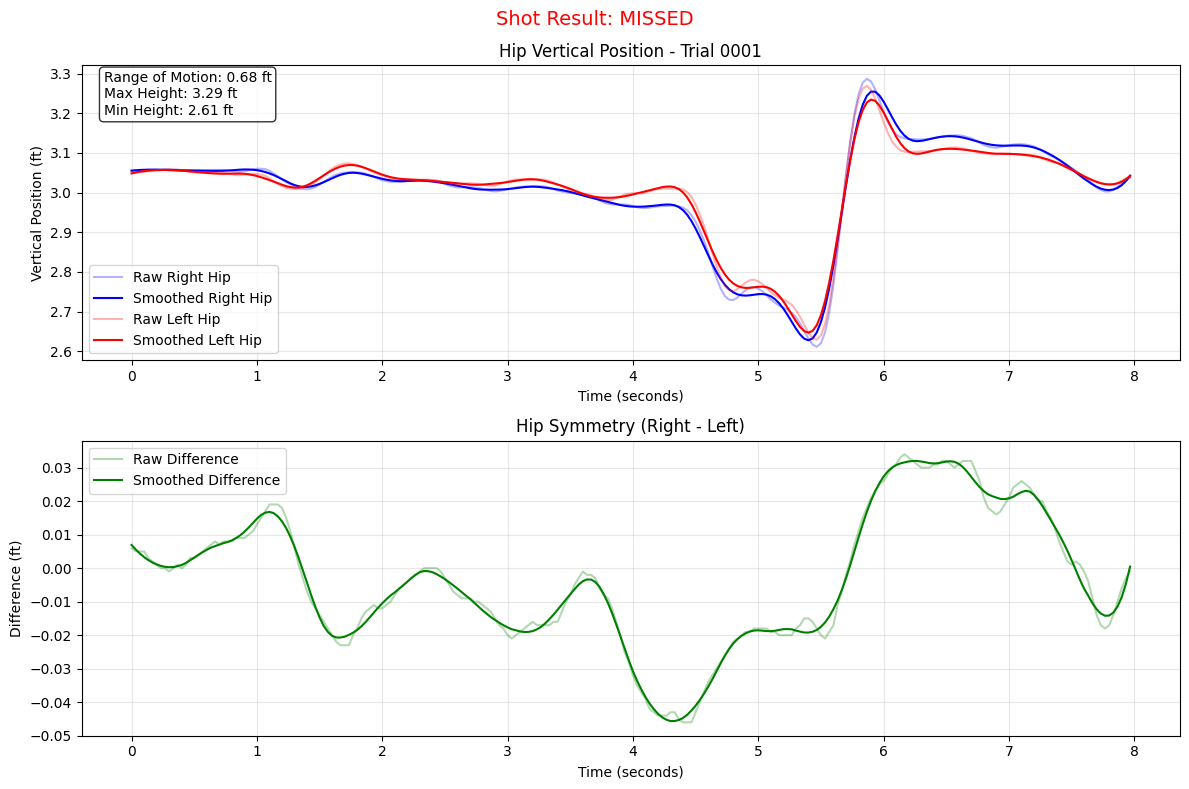

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.signal import savgol_filter

def analyze_hip_motion(player_id, trial_number, smooth=True):
    """
    Analyze hip motion during a free throw shot.
    
    Parameters:
    - player_id: string, player identifier
    - trial_number: int, trial number
    - smooth: boolean, whether to apply smoothing to the signal
    """
    # Format trial number
    trial_id = str(trial_number).zfill(4)
    
    # Load data
    with open(f'./data/{player_id}/BB_FT_{player_id}_T{trial_id}.json') as json_file:
        free_throw_data = json.load(json_file)
    
    # Extract positions
    right_hip_z = [f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']]
    left_hip_z = [f['data']['player']['L_HIP'][2] for f in free_throw_data['tracking']]
    frames = range(len(right_hip_z))
    
    # Calculate time points (assuming 30fps)
    time_points = [f/30 for f in frames]  # Convert to seconds
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot raw and smoothed trajectories
    if smooth:
        # Apply Savitzky-Golay filter for smoothing
        window = min(21, len(right_hip_z)-1 if len(right_hip_z) % 2 == 0 else len(right_hip_z)-2)
        right_hip_smooth = savgol_filter(right_hip_z, window, 3)
        left_hip_smooth = savgol_filter(left_hip_z, window, 3)
        
        # Plot both raw and smoothed data
        ax1.plot(time_points, right_hip_z, 'b-', alpha=0.3, label='Raw Right Hip')
        ax1.plot(time_points, right_hip_smooth, 'b-', label='Smoothed Right Hip')
        ax1.plot(time_points, left_hip_z, 'r-', alpha=0.3, label='Raw Left Hip')
        ax1.plot(time_points, left_hip_smooth, 'r-', label='Smoothed Left Hip')
    else:
        ax1.plot(time_points, right_hip_z, 'b-', label='Right Hip')
        ax1.plot(time_points, left_hip_z, 'r-', label='Left Hip')
    
    # Calculate and plot hip symmetry
    hip_difference = np.array(right_hip_z) - np.array(left_hip_z)
    if smooth:
        hip_difference_smooth = savgol_filter(hip_difference, window, 3)
        ax2.plot(time_points, hip_difference, 'g-', alpha=0.3, label='Raw Difference')
        ax2.plot(time_points, hip_difference_smooth, 'g-', label='Smoothed Difference')
    else:
        ax2.plot(time_points, hip_difference, 'g-', label='Hip Difference')
    
    # Calculate key metrics
    max_height = max(right_hip_z)
    min_height = min(right_hip_z)
    range_of_motion = max_height - min_height
    
    # Add metrics text
    metrics_text = f'Range of Motion: {range_of_motion:.2f} ft\n'
    metrics_text += f'Max Height: {max_height:.2f} ft\n'
    metrics_text += f'Min Height: {min_height:.2f} ft'
    
    ax1.text(0.02, 0.98, metrics_text,
             transform=ax1.transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Customize plots
    ax1.set_title(f'Hip Vertical Position - Trial {trial_id}')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Vertical Position (ft)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_title('Hip Symmetry (Right - Left)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Difference (ft)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add shot result
    shot_result = free_throw_data['result'].upper()
    result_color = 'green' if shot_result == 'MADE' else 'red'
    fig.suptitle(f'Shot Result: {shot_result}', color=result_color, fontsize=14)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Example usage
fig, axes = analyze_hip_motion('P0001', 1, smooth=True)
plt.show()

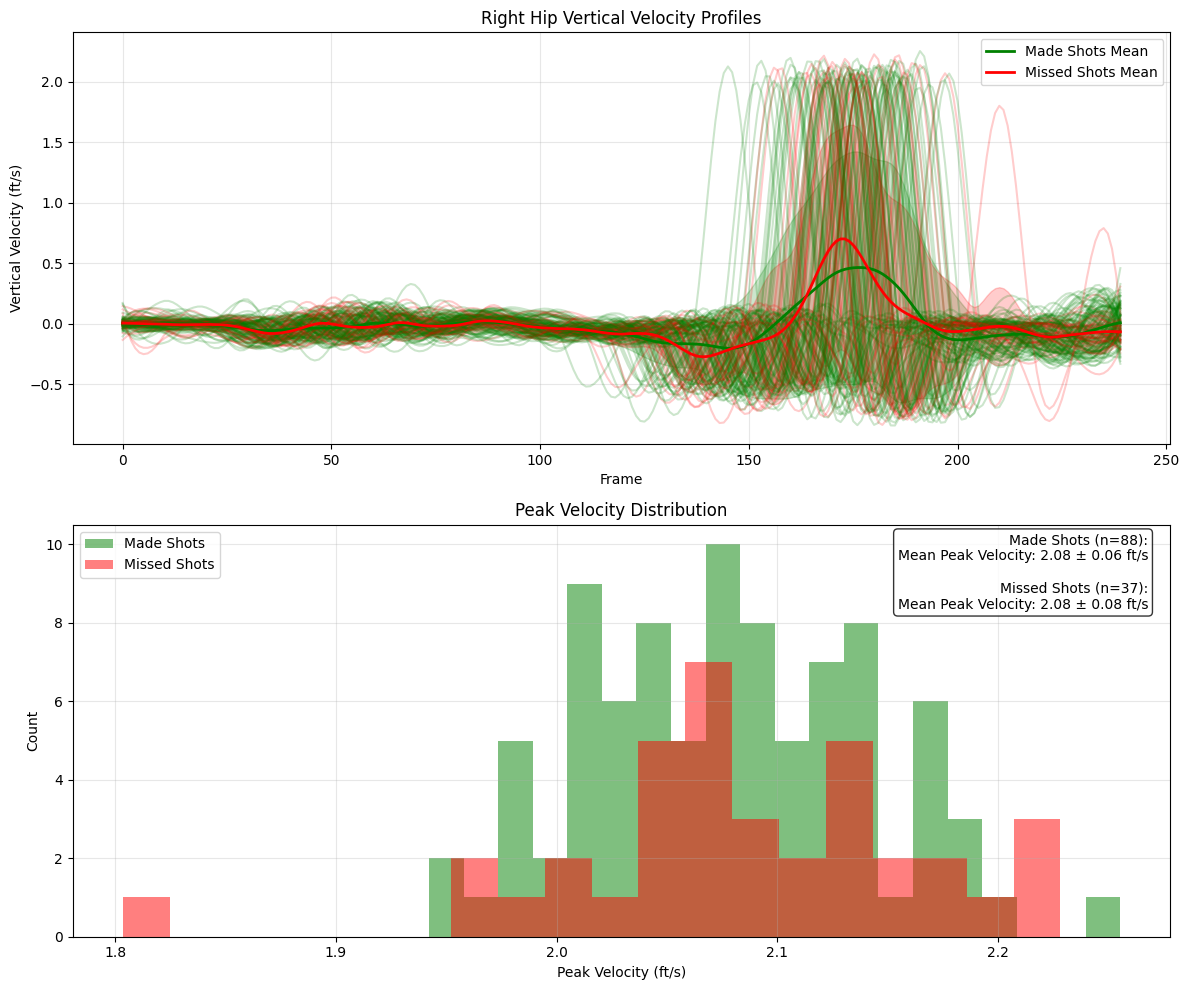

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import json
from statistics import mean, stdev

def analyze_hip_velocities(player_id, n_trials=125, smooth=True):
    """
    Analyze hip velocities across multiple free throw shots
    """
    # Store velocities for all trials
    all_velocities = []
    made_velocities = []
    missed_velocities = []
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Process each trial
    for trial_number in range(1, n_trials + 1):
        trial_id = str(trial_number).zfill(4)
        
        try:
            # Load trial data
            with open(f'./data/{player_id}/BB_FT_{player_id}_T{trial_id}.json') as json_file:
                free_throw_data = json.load(json_file)
            
            # Calculate velocity
            positions = [f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']]
            velocity = np.gradient(positions, 1/30)  # 30 fps
            
            # Apply smoothing if requested
            if smooth:
                window = min(21, len(velocity)-1 if len(velocity) % 2 == 0 else len(velocity)-2)
                velocity = savgol_filter(velocity, window, 3)
            
            # Store velocity data
            all_velocities.append(velocity)
            if free_throw_data['result'] == 'made':
                made_velocities.append(velocity)
                ax1.plot(velocity, 'g-', alpha=0.2)
            else:
                missed_velocities.append(velocity)
                ax1.plot(velocity, 'r-', alpha=0.2)
                
        except FileNotFoundError:
            print(f"Trial {trial_id} not found")
            continue
    
    # Calculate and plot average velocities
    if made_velocities:
        made_mean = np.mean(made_velocities, axis=0)
        made_std = np.std(made_velocities, axis=0)
        frames = range(len(made_mean))
        
        ax1.plot(frames, made_mean, 'g-', linewidth=2, label='Made Shots Mean')
        ax1.fill_between(frames, 
                        made_mean - made_std, 
                        made_mean + made_std, 
                        color='g', alpha=0.2)
    
    if missed_velocities:
        missed_mean = np.mean(missed_velocities, axis=0)
        missed_std = np.std(missed_velocities, axis=0)
        
        ax1.plot(frames, missed_mean, 'r-', linewidth=2, label='Missed Shots Mean')
        ax1.fill_between(frames, 
                        missed_mean - missed_std, 
                        missed_mean + missed_std, 
                        color='r', alpha=0.2)
    
    # Calculate velocity statistics
    def get_velocity_stats(velocities):
        if not velocities:
            return None
        peak_velocities = [max(abs(v)) for v in velocities]
        return {
            'mean_peak': mean(peak_velocities),
            'std_peak': stdev(peak_velocities),
            'max_peak': max(peak_velocities),
            'min_peak': min(peak_velocities)
        }
    
    made_stats = get_velocity_stats(made_velocities)
    missed_stats = get_velocity_stats(missed_velocities)
    
    # Plot velocity distributions
    if made_stats and missed_stats:
        made_peaks = [max(abs(v)) for v in made_velocities]
        missed_peaks = [max(abs(v)) for v in missed_velocities]
        
        ax2.hist(made_peaks, bins=20, alpha=0.5, color='g', label='Made Shots')
        ax2.hist(missed_peaks, bins=20, alpha=0.5, color='r', label='Missed Shots')
        
        # Add statistics text
        stats_text = f'Made Shots (n={len(made_velocities)}):\n'
        stats_text += f'Mean Peak Velocity: {made_stats["mean_peak"]:.2f} ± {made_stats["std_peak"]:.2f} ft/s\n\n'
        stats_text += f'Missed Shots (n={len(missed_velocities)}):\n'
        stats_text += f'Mean Peak Velocity: {missed_stats["mean_peak"]:.2f} ± {missed_stats["std_peak"]:.2f} ft/s'
        
        ax2.text(0.98, 0.98, stats_text,
                transform=ax2.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Customize plots
    ax1.set_title('Right Hip Vertical Velocity Profiles')
    ax1.set_xlabel('Frame')
    ax1.set_ylabel('Vertical Velocity (ft/s)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_title('Peak Velocity Distribution')
    ax2.set_xlabel('Peak Velocity (ft/s)')
    ax2.set_ylabel('Count')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Example usage
fig, axes = analyze_hip_velocities('P0001', n_trials=125, smooth=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.signal import savgol_filter

def analyze_hip_motion(player_id, trial_number, smooth=True):
    """
    Analyze hip motion during a free throw shot.
    
    Parameters:
    - player_id: string, player identifier
    - trial_number: int, trial number
    - smooth: boolean, whether to apply smoothing to the signal
    """
    # Format trial number
    trial_id = str(trial_number).zfill(4)
    
    # Load data
    with open(f'./data/{player_id}/BB_FT_{player_id}_T{trial_id}.json') as json_file:
        free_throw_data = json.load(json_file)
    
    # Extract positions
    right_hip_z = [f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']]
    left_hip_z = [f['data']['player']['L_HIP'][2] for f in free_throw_data['tracking']]
    frames = range(len(right_hip_z))
    
    # Calculate time points (assuming 30fps)
    time_points = [f/30 for f in frames]  # Convert to seconds
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot raw and smoothed trajectories
    if smooth:
        # Apply Savitzky-Golay filter for smoothing
        window = min(21, len(right_hip_z)-1 if len(right_hip_z) % 2 == 0 else len(right_hip_z)-2)
        right_hip_smooth = savgol_filter(right_hip_z, window, 3)
        left_hip_smooth = savgol_filter(left_hip_z, window, 3)
        
        # Plot both raw and smoothed data
        ax1.plot(time_points, right_hip_z, 'b-', alpha=0.3, label='Raw Right Hip')
        ax1.plot(time_points, right_hip_smooth, 'b-', label='Smoothed Right Hip')
        ax1.plot(time_points, left_hip_z, 'r-', alpha=0.3, label='Raw Left Hip')
        ax1.plot(time_points, left_hip_smooth, 'r-', label='Smoothed Left Hip')
    else:
        ax1.plot(time_points, right_hip_z, 'b-', label='Right Hip')
        ax1.plot(time_points, left_hip_z, 'r-', label='Left Hip')
    
    # Calculate and plot hip symmetry
    hip_difference = np.array(right_hip_z) - np.array(left_hip_z)
    if smooth:
        hip_difference_smooth = savgol_filter(hip_difference, window, 3)
        ax2.plot(time_points, hip_difference, 'g-', alpha=0.3, label='Raw Difference')
        ax2.plot(time_points, hip_difference_smooth, 'g-', label='Smoothed Difference')
    else:
        ax2.plot(time_points, hip_difference, 'g-', label='Hip Difference')
    
    # Calculate key metrics
    max_height = max(right_hip_z)
    min_height = min(right_hip_z)
    range_of_motion = max_height - min_height
    
    # Add metrics text
    metrics_text = f'Range of Motion: {range_of_motion:.2f} ft\n'
    metrics_text += f'Max Height: {max_height:.2f} ft\n'
    metrics_text += f'Min Height: {min_height:.2f} ft'
    
    ax1.text(0.02, 0.98, metrics_text,
             transform=ax1.transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Customize plots
    ax1.set_title(f'Hip Vertical Position - Trial {trial_id}')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Vertical Position (ft)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_title('Hip Symmetry (Right - Left)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Difference (ft)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add shot result
    shot_result = free_throw_data['result'].upper()
    result_color = 'green' if shot_result == 'MADE' else 'red'
    fig.suptitle(f'Shot Result: {shot_result}', color=result_color, fontsize=14)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Example usage
fig, axes = analyze_hip_motion('P0001', 1, smooth=True)
plt.show()

This type of analysis still skews very outcome-based. With the full-body pose data, we have the opportunity to look deeper into more process-based information from the free throw. Let's do that below:

### Plotting Keypoints Over Time

Given these are free throw trials, we know a lot of the power from the shot comes from the legs. To visualize this, let's see how the vertical velocity of the hip marker changes across the shot.

First, let's plot the hip vertical position for one shot:

Text(0.5, 1.0, 'Right Hip Vertical Position Over Shot')

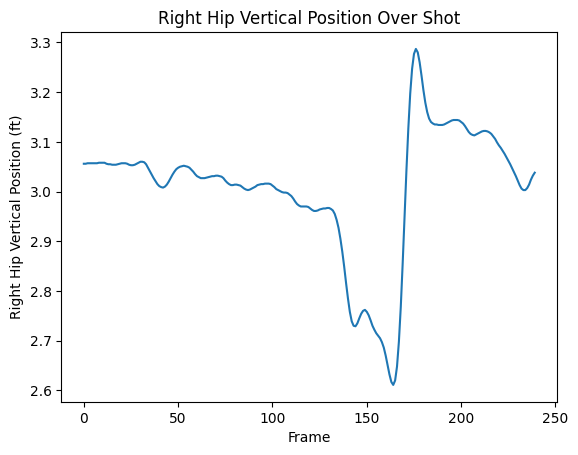

In [ ]:
for trial_number in range(1,126):

    trial_number_corrected = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_number_corrected}.json') as json_file:
        free_throw_data = json.load(json_file)

    hip_z_position = [f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']]

    plt.plot(hip_z_position)
    break

plt.xlabel('Frame')
plt.ylabel('Right Hip Vertical Position (ft)')
plt.title('Right Hip Vertical Position Over Shot')



Now, let's differentiate the position signal to get the vertical velocity of the hip in ft/s:

Text(0.5, 1.0, 'Right Hip Vertical Velocity Over Shot')

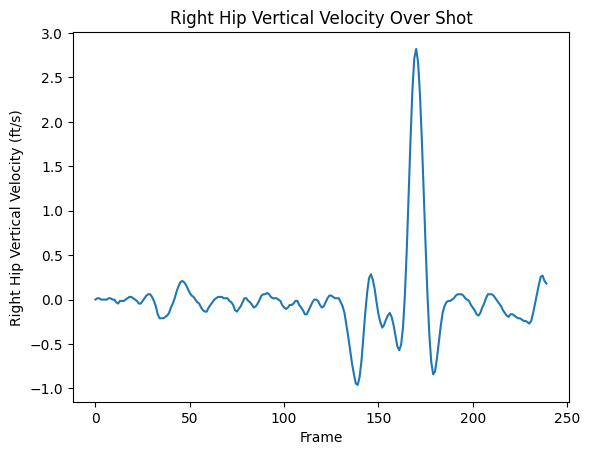

In [ ]:
for trial_number in range(1,126):

    trial_number_corrected = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_number_corrected}.json') as json_file:
        free_throw_data = json.load(json_file)

    hip_z_velocity = np.gradient([f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']], 1/30, axis=-1)

    plt.plot(hip_z_velocity)
    break

plt.xlabel('Frame')
plt.ylabel('Right Hip Vertical Velocity (ft/s)')
plt.title('Right Hip Vertical Velocity Over Shot')



The velocity graph clearly shows there is a peak, this is the point where the participant is extending up to propel the ball, let's see how this looks for all shots:

Text(0.5, 1.0, 'Right Hip Vertical Velocity Over All Shots')

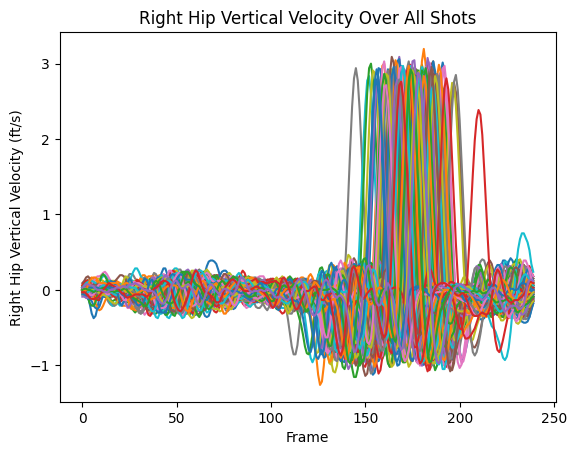

In [ ]:
for trial_number in range(1,126):

    trial_number_corrected = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_number_corrected}.json') as json_file:
        free_throw_data = json.load(json_file)

    hip_z_velocity = np.gradient([f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']], 1/30, axis=-1)

    plt.plot(hip_z_velocity)

plt.xlabel('Frame')
plt.ylabel('Right Hip Vertical Velocity (ft/s)')
plt.title('Right Hip Vertical Velocity Over All Shots')



Great, Let's now calculate the peak hip vertical velocity and see if this value relates to ball landing y-position. My thinking here is that a greater hip velocity will typically result in a farther shot, so there should be a relationship between these values.

Let's also color the shots based on wether they were made (green) or missed (red):

Text(0, 0.5, 'Ball Landing Position Y (inches)')

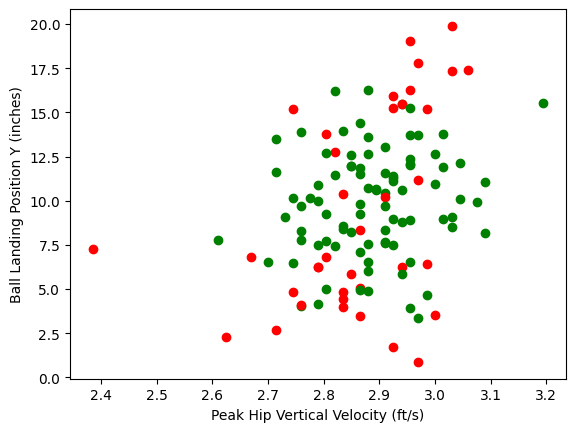

In [19]:
for trial_number in range(1,126):

    trial_number_corrected = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_number_corrected}.json') as json_file:
        free_throw_data = json.load(json_file)

    result = free_throw_data['result']

    peak_hip_z_velocity = np.nanmax(np.gradient([f['data']['player']['R_HIP'][2] for f in free_throw_data['tracking']], 1/30, axis=-1))

    plt.scatter(peak_hip_z_velocity, free_throw_data['landing_y'], color='green' if result == 'made' else 'red')

plt.xlabel('Peak Hip Vertical Velocity (ft/s)')
plt.ylabel('Ball Landing Position Y (inches)')



Interesting! A weak relationship does look like it's there but I've now also found what looks like a cluster of misses that have high peak hip vertical velocity and high ball landing position y values (top right of the figure), my next step here what other biomechanical processes are happening to result in these shots resulting in misses.

This is a great example of a basic line of biomechanical research that can be explored using the SPL Open Data basketball freethrow dataset, the rest is up to you!

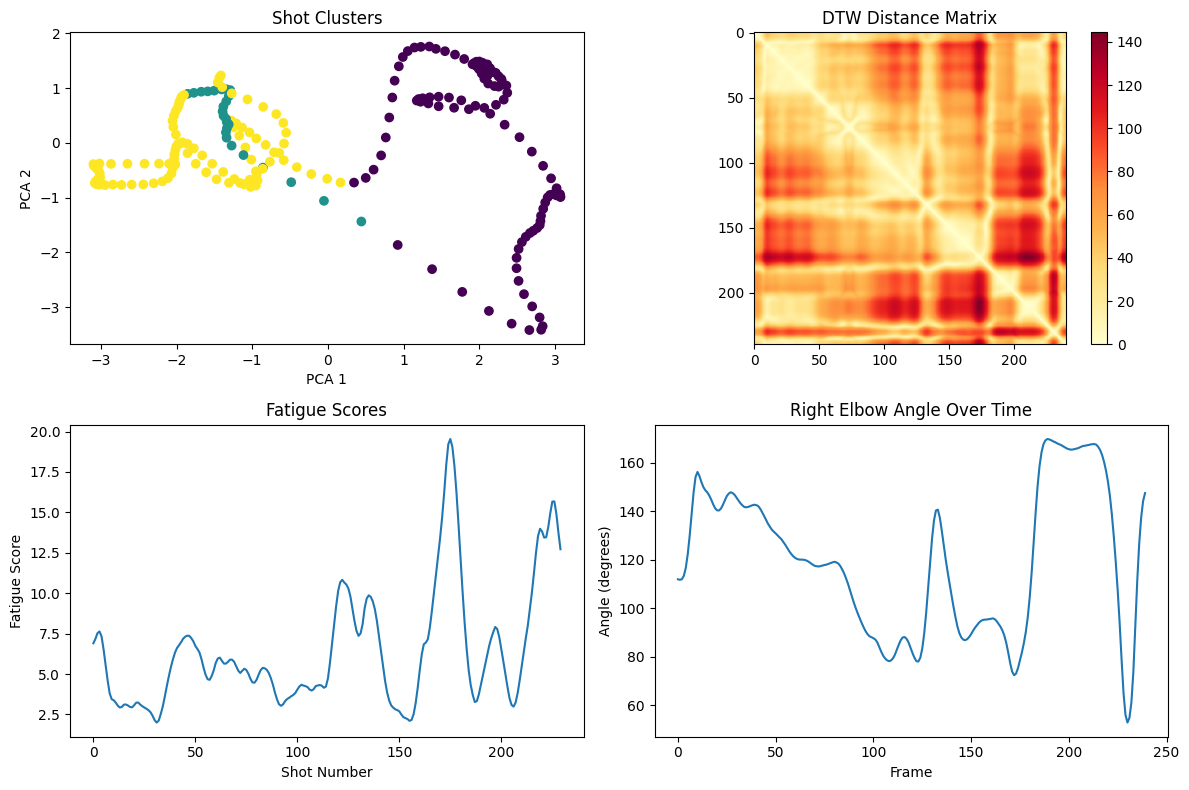

In [ ]:

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tslearn.metrics import dtw

# Load data

for trial_number in range(126):

    trial_id = str(trial_number).zfill(4)

    with open(f'./data/P0001/BB_FT_P0001_T{trial_id}.json') as json_file:
        data = json.load(json_file)
        # Extract relevant information
        frames = data['tracking']
        player_data = [frame['data']['player'] for frame in frames]
        ball_data = [frame['data']['ball'] for frame in frames]
        def extract_features(player_data):
            features = []
            for frame in player_data:
                # Joint angles
                right_elbow_angle = calculate_joint_angle(frame['R_SHOULDER'], frame['R_ELBOW'], frame['R_WRIST'])
                left_elbow_angle = calculate_joint_angle(frame['L_SHOULDER'], frame['L_ELBOW'], frame['L_WRIST'])
                right_knee_angle = calculate_joint_angle(frame['R_HIP'], frame['R_KNEE'], frame['R_ANKLE'])
                left_knee_angle = calculate_joint_angle(frame['L_HIP'], frame['L_KNEE'], frame['L_ANKLE'])

                # Body symmetry
                shoulder_symmetry = np.linalg.norm(np.array(frame['R_SHOULDER']) - np.array(frame['L_SHOULDER']))
                hip_symmetry = np.linalg.norm(np.array(frame['R_HIP']) - np.array(frame['L_HIP']))

                # Vertical displacement of key joints
                wrist_displacement = frame['R_WRIST'][1]  # Assuming y-axis is vertical

                features.append([right_elbow_angle, left_elbow_angle, right_knee_angle, left_knee_angle,
                                shoulder_symmetry, hip_symmetry, wrist_displacement])

            return np.array(features)

        def calculate_joint_angle(point1, point2, point3):
            vector1 = np.array(point1) - np.array(point2)
            vector2 = np.array(point3) - np.array(point2)
            return np.degrees(np.arccos(np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))))

        features = extract_features(player_data)
        def compute_dtw_matrix(features):
            n_shots = len(features)
            dtw_matrix = np.zeros((n_shots, n_shots))

            for i in range(n_shots):
                for j in range(i+1, n_shots):
                    distance = dtw(features[i], features[j])
                    dtw_matrix[i, j] = dtw_matrix[j, i] = distance

            return dtw_matrix

        dtw_matrix = compute_dtw_matrix(features)
        # PCA
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        pca = PCA(n_components=0.95)  # Retain 95% of variance
        features_pca = pca.fit_transform(features_scaled)

        # K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(features_pca)
        def detect_fatigue(features, window_size=10):
            n_shots = len(features)
            fatigue_scores = []

            for i in range(n_shots - window_size):
                window1 = features[i:i+window_size]
                window2 = features[i+1:i+window_size+1]

                diff = np.mean(np.abs(window2 - window1), axis=0)
                fatigue_score = np.sum(diff)
                fatigue_scores.append(fatigue_score)

            return np.array(fatigue_scores)

        fatigue_scores = detect_fatigue(features)
        plt.figure(figsize=(12, 8))

        # Plot clusters
        plt.subplot(2, 2, 1)
        plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
        plt.title('Shot Clusters')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')

        # Plot DTW matrix
        plt.subplot(2, 2, 2)
        plt.imshow(dtw_matrix, cmap='YlOrRd')
        plt.title('DTW Distance Matrix')
        plt.colorbar()

        # Plot fatigue scores
        plt.subplot(2, 2, 3)
        plt.plot(fatigue_scores)
        plt.title('Fatigue Scores')
        plt.xlabel('Shot Number')
        plt.ylabel('Fatigue Score')

        # Plot key feature over time
        plt.subplot(2, 2, 4)
        plt.plot(features[:, 0])  # Right elbow angle
        plt.title('Right Elbow Angle Over Time')
        plt.xlabel('Frame')
        plt.ylabel('Angle (degrees)')

        plt.tight_layout()
        plt.show()
        break





In [20]:
!pip install tensorflow
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


Loaded 125 trials


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.4078 - loss: 0.7358 - val_accuracy: 0.7500 - val_loss: 0.6584
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6438 - loss: 0.6614 - val_accuracy: 0.7500 - val_loss: 0.5936
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6719 - loss: 0.6296 - val_accuracy: 0.7500 - val_loss: 0.5724
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6914 - loss: 0.6473 - val_accuracy: 0.7500 - val_loss: 0.5628
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6797 - loss: 0.6207 - val_accuracy: 0.7500 - val_loss: 0.5609
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6914 - loss: 0.6594 - val_accuracy: 0.7500 - val_loss: 0.5610
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6641 - loss: 0.6606 - val_accuracy: 0.7500 - val_loss: 0.5641
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6953 - loss: 0.5990 - val_accuracy: 0.7500 - val_loss: 0.5659

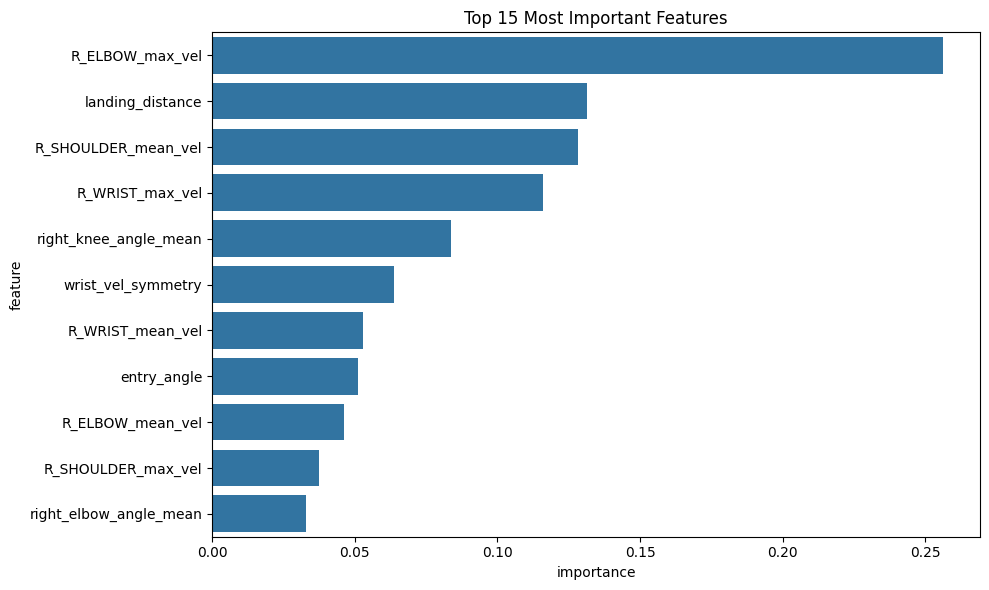

In [21]:
import os
import json
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

class BiomechanicalAnalyzer:
    def __init__(self, data_path):
        """Initialize the analyzer with path to data directory."""
        self.data_path = data_path
        self.trials_data = []
        self.connections = [
            ("R_EYE", "L_EYE"),
            ("R_EYE", "NOSE"),
            ("L_EYE", "NOSE"),
            ("R_EYE", "R_EAR"),
            ("L_EYE", "L_EAR"),
            ("R_SHOULDER", "L_SHOULDER"),
            ("R_SHOULDER", "R_ELBOW"),
            ("L_SHOULDER", "L_ELBOW"),
            ("R_ELBOW", "R_WRIST"),
            ("L_ELBOW", "L_WRIST"),
            ("R_SHOULDER", "R_HIP"),
            ("L_SHOULDER", "L_HIP"),
            ("R_HIP", "L_HIP"),
            ("R_HIP", "R_KNEE"),
            ("L_HIP", "L_KNEE")
        ]

    def load_data(self):
        """Load all JSON files from the data directory."""
        json_files = [f for f in os.listdir(self.data_path) if f.endswith('.json')]
        for file_name in json_files:
            with open(os.path.join(self.data_path, file_name), 'r') as f:
                trial_data = json.load(f)
                self.trials_data.append(trial_data)
        print(f"Loaded {len(self.trials_data)} trials")

    def preprocess_trial(self, trial_data):
        """Preprocess a single trial's data."""
        # Extract metadata
        metadata = {
            'participant_id': trial_data['participant_id'],
            'trial_id': trial_data['trial_id'],
            'result': trial_data['result'],
            'landing_x': trial_data['landing_x'],
            'landing_y': trial_data['landing_y'],
            'entry_angle': trial_data['entry_angle']
        }

        # Convert tracking data to DataFrame
        frames = []
        for frame in trial_data['tracking']:
            frame_data = {
                'frame': frame['frame'],
                'time': frame['time']
            }
            
            # Add player joint positions
            for joint, position in frame['data']['player'].items():
                frame_data[f'{joint}_x'] = position[0]
                frame_data[f'{joint}_y'] = position[1]
                frame_data[f'{joint}_z'] = position[2]
            
            frames.append(frame_data)
        
        df = pd.DataFrame(frames)
        
        # Apply Savitzky-Golay filter to smooth trajectories
        for joint in trial_data['tracking'][0]['data']['player'].keys():
            for coord in ['x', 'y', 'z']:
                col = f'{joint}_{coord}'
                df[col] = savgol_filter(df[col], window_length=5, polyorder=2)
        
        return metadata, df

    def calculate_joint_angle(self, df, joint1, joint2, joint3):
        """Calculate angle between three joints."""
        v1 = df[[f'{joint1}_x', f'{joint1}_y', f'{joint1}_z']].values - \
             df[[f'{joint2}_x', f'{joint2}_y', f'{joint2}_z']].values
        
        v2 = df[[f'{joint3}_x', f'{joint3}_y', f'{joint3}_z']].values - \
             df[[f'{joint2}_x', f'{joint2}_y', f'{joint2}_z']].values
        
        dot_product = np.sum(v1 * v2, axis=1)
        v1_norm = np.linalg.norm(v1, axis=1)
        v2_norm = np.linalg.norm(v2, axis=1)
        
        angles = np.arccos(dot_product / (v1_norm * v2_norm))
        return np.degrees(angles)

    def calculate_velocity(self, df, joint):
        """Calculate velocity of a joint."""
        pos = df[[f'{joint}_x', f'{joint}_y', f'{joint}_z']].values
        time = df['time'].values
        vel = np.diff(pos, axis=0) / np.diff(time)[:, None]
        return vel

    def extract_features(self, metadata, df):
        """Extract features from trial data."""
        features = {}
        
        # Metadata features
        features['entry_angle'] = metadata['entry_angle']
        features['landing_distance'] = np.sqrt(metadata['landing_x']**2 + metadata['landing_y']**2)
        
        # Joint angles
        features['right_elbow_angle_mean'] = np.mean(self.calculate_joint_angle(
            df, 'R_SHOULDER', 'R_ELBOW', 'R_WRIST'
        ))
        features['right_knee_angle_mean'] = np.mean(self.calculate_joint_angle(
            df, 'R_HIP', 'R_KNEE', 'R_ANKLE'
        ))
        
        # Velocities
        for joint in ['R_WRIST', 'R_ELBOW', 'R_SHOULDER']:
            vel = self.calculate_velocity(df, joint)
            vel_mag = np.linalg.norm(vel, axis=1)
            features[f'{joint}_max_vel'] = np.max(vel_mag)
            features[f'{joint}_mean_vel'] = np.mean(vel_mag)
        
        # Movement symmetry
        r_wrist_vel = self.calculate_velocity(df, 'R_WRIST')
        l_wrist_vel = self.calculate_velocity(df, 'L_WRIST')
        features['wrist_vel_symmetry'] = np.mean(
            np.linalg.norm(r_wrist_vel - l_wrist_vel, axis=1)
        )
        
        return features

    def prepare_dataset(self):
        """Prepare dataset for modeling."""
        X = []
        y = []
        
        for trial_data in self.trials_data:
            metadata, df = self.preprocess_trial(trial_data)
            features = self.extract_features(metadata, df)
            X.append(features)
            y.append(1 if metadata['result'] == 'missed' else 0)
        
        return pd.DataFrame(X), np.array(y)

    def train_models(self):
        """Train and evaluate models."""
        # Prepare dataset
        X, y = self.prepare_dataset()
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train Random Forest
        rf_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )
        rf_model.fit(X_train_scaled, y_train)
        
        # Train XGBoost
        xgb_model = xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        xgb_model.fit(X_train_scaled, y_train)
        
        # Prepare sequences for LSTM
        sequence_length = 10
        X_seq = self.prepare_sequences(sequence_length)
        X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
            X_seq, y, test_size=0.2, random_state=42
        )
        
        # Train LSTM
        lstm_model = Sequential([
            LSTM(64, input_shape=(sequence_length, X_seq.shape[2]), return_sequences=True),
            Dropout(0.3),
            LSTM(32),
            Dropout(0.3),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        
        lstm_model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        lstm_model.fit(
            X_train_seq, y_train_seq,
            epochs=50,
            batch_size=32,
            validation_split=0.2,
            verbose=1
        )
        
        return rf_model, xgb_model, lstm_model

    def prepare_sequences(self, sequence_length):
        """Prepare sequences for LSTM model."""
        sequences = []
        
        for trial_data in self.trials_data:
            metadata, df = self.preprocess_trial(trial_data)
            
            # Resample to fixed number of frames
            frames = len(df)
            indices = np.linspace(0, frames-1, sequence_length, dtype=int)
            
            # Extract features for each frame
            sequence = []
            for idx in indices:
                frame_features = []
                for joint in ['R_WRIST', 'L_WRIST', 'R_ELBOW', 'L_ELBOW', 'R_SHOULDER', 'L_SHOULDER']:
                    for coord in ['x', 'y', 'z']:
                        frame_features.append(df.iloc[idx][f'{joint}_{coord}'])
                sequence.append(frame_features)
            
            sequences.append(sequence)
        
        return np.array(sequences)

# Usage example
if __name__ == "__main__":
    analyzer = BiomechanicalAnalyzer("data/P0001")
    analyzer.load_data()
    
    # Train models
    rf_model, xgb_model, lstm_model = analyzer.train_models()
    
    # Get feature importance from Random Forest
    X, y = analyzer.prepare_dataset()
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

In [22]:
import json
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks
from pathlib import Path
class FatigueAnalyzer:
    def __init__(self):
        self.scaler = StandardScaler()

    def extract_features(self, json_data):
        frames = json_data['tracking']
        features = {}

        # 1. Release Velocity Features
        release_idx = self._find_release_frame(frames)
        if release_idx:
            ball_velocities = self._calculate_ball_velocities(frames)
            features['release_velocity'] = ball_velocities[release_idx]
            features['velocity_consistency'] = np.std(ball_velocities[:release_idx])

        # 2. Joint Angle Variations
        knee_angles = self._calculate_knee_angles(frames)
        elbow_angles = self._calculate_elbow_angles(frames)
        features.update({
            'knee_angle_variation': np.std(knee_angles),
            'elbow_angle_variation': np.std(elbow_angles),
            'max_knee_flexion': np.min(knee_angles),
            'elbow_rom': np.ptp(elbow_angles)  # Range of motion
        })

        # 3. Movement Smoothness
        features.update(self._calculate_smoothness_metrics(frames))

        # 4. Temporal Features
        features.update(self._extract_temporal_features(frames))

        # 5. Shot Accuracy Metrics
        features.update({
            'entry_angle': json_data['entry_angle'],
            'landing_distance': np.sqrt(json_data['landing_x']**2 + json_data['landing_y']**2)
        })

        return features

    def _find_release_frame(self, frames):
        ball_positions = np.array([frame['data']['ball'] for frame in frames])
        velocities = np.linalg.norm(np.diff(ball_positions, axis=0), axis=1)
        peaks, _ = find_peaks(velocities)
        return peaks[0] if len(peaks) > 0 else None

    def _calculate_ball_velocities(self, frames):
        ball_positions = np.array([frame['data']['ball'] for frame in frames])
        return np.linalg.norm(np.diff(ball_positions, axis=0), axis=1)

    def _calculate_knee_angles(self, frames):
        angles = []
        for frame in frames:
            tracking = frame['data']['player']
            hip = np.array([tracking['R_HIP'][0], tracking['R_HIP'][1], tracking['R_HIP'][2]])
            knee = np.array([tracking['R_KNEE'][0], tracking['R_KNEE'][1], tracking['R_KNEE'][2]])
            ankle = np.array([tracking['R_ANKLE'][0], tracking['R_ANKLE'][1], tracking['R_ANKLE'][2]])
            
            hip_knee = knee - hip
            knee_ankle = ankle - knee
            
            angle = np.arccos(np.dot(hip_knee, knee_ankle) / (np.linalg.norm(hip_knee) * np.linalg.norm(knee_ankle)))
            angles.append(np.degrees(angle))
        return np.array(angles)

    def _calculate_elbow_angles(self, frames):
        angles = []
        for frame in frames:
            tracking = frame['data']['player']
            shoulder = np.array([tracking['R_SHOULDER'][0], tracking['R_SHOULDER'][1], tracking['R_SHOULDER'][2]])
            elbow = np.array([tracking['R_ELBOW'][0], tracking['R_ELBOW'][1], tracking['R_ELBOW'][2]])
            wrist = np.array([tracking['R_WRIST'][0], tracking['R_WRIST'][1], tracking['R_WRIST'][2]])
            
            shoulder_elbow = elbow - shoulder
            elbow_wrist = wrist - elbow
            
            angle = np.arccos(np.dot(shoulder_elbow, elbow_wrist) / (np.linalg.norm(shoulder_elbow) * np.linalg.norm(elbow_wrist)))
            angles.append(np.degrees(angle))
        return np.array(angles)

    def _calculate_smoothness_metrics(self, frames):
        wrist_positions = np.array([frame['data']['player']['R_WRIST'] for frame in frames])
        velocities = np.diff(wrist_positions, axis=0)
        accelerations = np.diff(velocities, axis=0)
        jerk = np.diff(accelerations, axis=0)
        return {
            'movement_jerk': np.mean(np.linalg.norm(jerk, axis=1)),
            'movement_smoothness': 1 / (1 + np.std(np.linalg.norm(jerk, axis=1)))
        }

    def _extract_temporal_features(self, frames):
        return {
            'shot_duration': frames[-1]['time'] - frames[0]['time'],
            'preparation_time': self._calculate_preparation_time(frames)
        }

    def _calculate_preparation_time(self, frames):
        knee_angles = self._calculate_knee_angles(frames)
        min_knee_idx = np.argmin(knee_angles)
        return frames[min_knee_idx]['time'] - frames[0]['time']

    def calculate_fatigue_score(self, features_list):
        feature_array = np.array([list(f.values()) for f in features_list])
        normalized_features = self.scaler.fit_transform(feature_array)
        
        movement_consistency = -np.mean([
            f['knee_angle_variation'] + f['elbow_angle_variation'] + f['movement_jerk']
            for f in features_list
        ])
        shot_accuracy = -np.mean([f['landing_distance'] for f in features_list])
        
        fatigue_score = 100 * (
            0.4 * stats.norm.cdf(movement_consistency) +
            0.6 * stats.norm.cdf(shot_accuracy)
        )
        return np.clip(fatigue_score, 0, 100)

def process_shot_files(directory_path):
    """Process all JSON files in the specified directory"""
    # Get all JSON files in the directory
    json_files = list(Path(directory_path).glob('*.json'))
    
    if not json_files:
        raise ValueError(f"No JSON files found in {directory_path}")
    
    analyzer = FatigueAnalyzer()
    all_features = []
    processed_files = []

    for file_path in json_files:
        try:
            with open(file_path, 'r') as f:
                shot_data = json.load(f)
            
            # Extract features
            features = analyzer.extract_features(shot_data)
            all_features.append(features)
            processed_files.append(str(file_path))
            
            print(f"Successfully processed: {file_path.name}")
        except Exception as e:
            print(f"Error processing {file_path.name}: {str(e)}")
            continue

    if not all_features:
        raise ValueError("No files were successfully processed")

    fatigue_score = analyzer.calculate_fatigue_score(all_features)
    return fatigue_score, all_features, processed_files
def main():
    # Path to your data directory
    data_directory = "data/P0001"  # Adjust this path based on your actual directory structure
    
    try:
        fatigue_score, features, processed_files = process_shot_files(data_directory)
        
        print("\nAnalysis Results:")
        print(f"Number of files processed: {len(processed_files)}")
        print(f"Fatigue Score: {fatigue_score:.2f}")
        
        # Print features for each processed file
        for file_name, feature_set in zip(processed_files, features):
            print(f"\nFeatures for {Path(file_name).name}:")
            for key, value in feature_set.items():
                print(f"{key}: {value:.4f}")
            
    except Exception as e:
        print(f"Error during analysis: {str(e)}")

if __name__ == "__main__":
    main()

Successfully processed: BB_FT_P0001_T0032.json
Successfully processed: BB_FT_P0001_T0110.json
Successfully processed: BB_FT_P0001_T0112.json
Successfully processed: BB_FT_P0001_T0117.json
Successfully processed: BB_FT_P0001_T0003.json
Successfully processed: BB_FT_P0001_T0040.json
Successfully processed: BB_FT_P0001_T0094.json
Successfully processed: BB_FT_P0001_T0052.json
Successfully processed: BB_FT_P0001_T0026.json
Successfully processed: BB_FT_P0001_T0050.json
Successfully processed: BB_FT_P0001_T0093.json
Successfully processed: BB_FT_P0001_T0124.json
Successfully processed: BB_FT_P0001_T0002.json
Successfully processed: BB_FT_P0001_T0107.json
Successfully processed: BB_FT_P0001_T0020.json
Successfully processed: BB_FT_P0001_T0122.json
Successfully processed: BB_FT_P0001_T0044.json
Successfully processed: BB_FT_P0001_T0015.json
Successfully processed: BB_FT_P0001_T0073.json
Successfully processed: BB_FT_P0001_T0109.json
Successfully processed: BB_FT_P0001_T0081.json
Successfully 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [23]:
import numpy as np
import pandas as pd
from collections import deque
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks
import json
import os

class RealtimeFatigueMonitor:
    def __init__(self, window_size=10, buffer_size=50, threshold_sensitivity=0.8, data_directory='./data'):
        self.window_size = window_size
        self.buffer_size = buffer_size
        self.threshold_sensitivity = threshold_sensitivity
        self.data_directory = data_directory
        
        self.shot_buffer = deque(maxlen=buffer_size)
        self.score_buffer = deque(maxlen=buffer_size)
        self.scaler = StandardScaler()
        
        self.performance_metrics = {
            'shot_percentage': deque(maxlen=buffer_size),
            'coach_ratings': deque(maxlen=buffer_size),
            'correlation_scores': deque(maxlen=buffer_size)
        }
        
        self.fatigue_thresholds = {
            'low': 30,
            'moderate': 60,
            'high': 80
        }
        
        self.confidence_scores = deque(maxlen=buffer_size)

    def process_shot(self, file_name, coach_rating=None, shot_made=None):
        file_path = os.path.join(self.data_directory, file_name)
        with open(file_path, 'r') as f:
            shot_data = json.load(f)
        
        features = self._extract_features(shot_data)
        self.shot_buffer.append(features)
        
        fatigue_score, confidence = self._calculate_fatigue_score()
        self.score_buffer.append(fatigue_score)
        self.confidence_scores.append(confidence)
        
        if coach_rating is not None:
            self._update_validation_metrics(fatigue_score, coach_rating)
        
        if shot_made is not None:
            self.performance_metrics['shot_percentage'].append(int(shot_made))
        
        alerts = self._generate_alerts(fatigue_score)
        trend = self._calculate_trend()
        
        return {
            'fatigue_score': fatigue_score,
            'confidence': confidence,
            'alerts': alerts,
            'trend': trend
        }

    def _extract_features(self, shot_data):
        frames = pd.DataFrame(shot_data['tracking'])
        features = {}
        
        # Release Velocity Features
        release_idx = self._find_release_frame(frames)
        if release_idx:
            ball_velocities = self._calculate_ball_velocities(frames)
            features['release_velocity'] = ball_velocities[release_idx]
            features['velocity_consistency'] = np.std(ball_velocities[:release_idx])
        
        # Joint Angle Variations
        knee_angles = self._calculate_knee_angles(frames)
        elbow_angles = self._calculate_elbow_angles(frames)
        features.update({
            'knee_angle_variation': np.std(knee_angles),
            'elbow_angle_variation': np.std(elbow_angles),
            'max_knee_flexion': np.min(knee_angles),
            'elbow_rom': np.ptp(elbow_angles)
        })
        
        # Movement Smoothness
        features.update(self._calculate_smoothness_metrics(frames))
        
        # Temporal Features
        features.update(self._extract_temporal_features(frames))
        
        # Shot Accuracy Metrics
        features.update({
            'entry_angle': shot_data['entry_angle'],
            'landing_distance': np.sqrt(shot_data['landing_x']**2 + shot_data['landing_y']**2)
        })
        
        return features

    def _find_release_frame(self, frames):
        ball_positions = np.array([frame['data']['ball'] for _, frame in frames.iterrows()])
        velocities = np.linalg.norm(np.diff(ball_positions, axis=0), axis=1)
        peaks, _ = find_peaks(velocities)
        return peaks[0] if len(peaks) > 0 else None

    def _calculate_ball_velocities(self, frames):
        ball_positions = np.array([frame['data']['ball'] for _, frame in frames.iterrows()])
        return np.linalg.norm(np.diff(ball_positions, axis=0), axis=1)

    def _calculate_knee_angles(self, frames):
        angles = []
        for _, frame in frames.iterrows():
            hip = np.array(frame['data']['player']['R_HIP'])
            knee = np.array(frame['data']['player']['R_KNEE'])
            ankle = np.array(frame['data']['player']['R_ANKLE'])
            
            hip_knee = knee - hip
            knee_ankle = ankle - knee
            
            angle = np.arccos(np.dot(hip_knee, knee_ankle) / (np.linalg.norm(hip_knee) * np.linalg.norm(knee_ankle)))
            angles.append(np.degrees(angle))
        return np.array(angles)

    def _calculate_elbow_angles(self, frames):
        angles = []
        for _, frame in frames.iterrows():
            shoulder = np.array(frame['data']['player']['R_SHOULDER'])
            elbow = np.array(frame['data']['player']['R_ELBOW'])
            wrist = np.array(frame['data']['player']['R_WRIST'])
            
            shoulder_elbow = elbow - shoulder
            elbow_wrist = wrist - elbow
            
            angle = np.arccos(np.dot(shoulder_elbow, elbow_wrist) / (np.linalg.norm(shoulder_elbow) * np.linalg.norm(elbow_wrist)))
            angles.append(np.degrees(angle))
        return np.array(angles)

    def _calculate_smoothness_metrics(self, frames):
        wrist_positions = np.array([frame['data']['player']['R_WRIST'] for _, frame in frames.iterrows()])
        velocities = np.diff(wrist_positions, axis=0)
        accelerations = np.diff(velocities, axis=0)
        jerk = np.diff(accelerations, axis=0)
        return {
            'movement_jerk': np.mean(np.linalg.norm(jerk, axis=1)),
            'movement_smoothness': 1 / (1 + np.std(np.linalg.norm(jerk, axis=1)))
        }

    def _extract_temporal_features(self, frames):
        return {
            'shot_duration': frames['time'].iloc[-1] - frames['time'].iloc[0],
            'preparation_time': self._calculate_preparation_time(frames)
        }

    def _calculate_preparation_time(self, frames):
        knee_angles = self._calculate_knee_angles(frames)
        min_knee_idx = np.argmin(knee_angles)
        return frames['time'].iloc[min_knee_idx] - frames['time'].iloc[0]

    def _calculate_fatigue_score(self):
        if len(self.shot_buffer) < self.window_size:
            return 50.0, 0.5  # Default values with low confidence
        
        recent_shots = list(self.shot_buffer)[-self.window_size:]
        
        weights = np.exp(np.linspace(-1, 0, len(recent_shots)))
        weights /= weights.sum()
        
        weighted_scores = []
        for shot, weight in zip(recent_shots, weights):
            score = (
                0.3 * shot['smoothness'] +
                0.3 * (1 - shot['velocity_std']) +
                0.4 * (1 - shot['mean_jerk'])
            )
            weighted_scores.append(score * weight)
        
        confidence = 1 / (1 + np.std(weighted_scores))
        fatigue_score = 100 * (1 - np.sum(weighted_scores))
        return np.clip(fatigue_score, 0, 100), confidence

    def _update_validation_metrics(self, fatigue_score, coach_rating):
        self.performance_metrics['coach_ratings'].append(coach_rating)
        
        if len(self.performance_metrics['coach_ratings']) >= 3:
            correlation = stats.pearsonr(
                list(self.score_buffer)[-len(self.performance_metrics['coach_ratings']):],
                list(self.performance_metrics['coach_ratings'])
            )[0]
            self.performance_metrics['correlation_scores'].append(correlation)

    def _calculate_trend(self):
        if len(self.score_buffer) < 3:
            return {'slope': 0, 'r_squared': 0}
        
        x = np.arange(len(self.score_buffer))
        y = np.array(list(self.score_buffer))
        
        slope, intercept = np.polyfit(x, y, 1)
        r_squared = np.corrcoef(x, y)[0, 1]**2
        
        return {
            'slope': slope,
            'r_squared': r_squared
        }

    def _generate_alerts(self, fatigue_score):
        alerts = []
        
        if fatigue_score > self.fatigue_thresholds['high']:
            alerts.append("HIGH FATIGUE: Consider resting player")
        elif fatigue_score > self.fatigue_thresholds['moderate']:
            alerts.append("MODERATE FATIGUE: Monitor closely")
        
        if len(self.score_buffer) >= 3:
            recent_trend = self._calculate_trend()
            if recent_trend['slope'] > 5 and recent_trend['r_squared'] > 0.7:
                alerts.append("RAPID FATIGUE INCREASE DETECTED")
        
        return alerts

    def get_validation_metrics(self):
        return {
            'coach_correlation': np.mean(self.performance_metrics['correlation_scores'])
                if self.performance_metrics['correlation_scores'] else None,
            'shot_percentage': np.mean(self.performance_metrics['shot_percentage'])
                if self.performance_metrics['shot_percentage'] else None,
            'confidence_mean': np.mean(self.confidence_scores),
        }

    def update_thresholds(self, new_thresholds):
        self.fatigue_thresholds.update(new_thresholds)

# Example usage
monitor = RealtimeFatigueMonitor(data_directory='./data/P0001')

for file_name in os.listdir(monitor.data_directory):
    if file_name.endswith('.json'):
        result = monitor.process_shot(file_name, coach_rating=None, shot_made=None)
        print(f"Processed {file_name}: Fatigue Score = {result['fatigue_score']:.2f}, Confidence = {result['confidence']:.2f}")
        if result['alerts']:
            print("Alerts:", result['alerts'])
        print("Trend:", result['trend'])
        print("---")

validation_metrics = monitor.get_validation_metrics()
print("Validation Metrics:", validation_metrics)

Processed BB_FT_P0001_T0032.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': 0, 'r_squared': 0}
---
Processed BB_FT_P0001_T0110.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': 0, 'r_squared': 0}
---


/usr/local/python/3.12.1/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/python/3.12.1/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Processed BB_FT_P0001_T0112.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(6.908781943208798e-15), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0117.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(4.219619801694313e-15), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0003.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(-5.343887531158754e-15), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0040.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(-4.013084026856195e-15), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0094.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(1.2949544152324087e-16), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0052.json: Fatigue Score = 50.00, Confidence = 0.50
Trend: {'slope': np.float64(-4.616483787760807e-15), 'r_squared': np.float64(nan)}
---
Processed BB_FT_P0001_T0026.js

KeyError: 'smoothness'

In [ ]:

import numpy as np
import pandas as pd
from collections import deque
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc
import warnings
from typing import Dict, List, Tuple, Optional
warnings.filterwarnings('ignore')

class RealtimeFatigueMonitor:
    """
    Real-time fatigue monitoring system with validation and practical applications.
    """
    def __init__(
        self,
        window_size: int = 10,
        buffer_size: int = 50,
        threshold_sensitivity: float = 0.8,
        anomaly_contamination: float = 0.1
    ):
        self.shot_buffer = deque(maxlen=buffer_size)
        self.score_buffer = deque(maxlen=buffer_size)
        self.window_size = window_size
        self.threshold_sensitivity = threshold_sensitivity
        self.anomaly_detector = IsolationForest(
            contamination=anomaly_contamination,
            random_state=42
        )
        self.performance_metrics = {
            'shot_percentage': deque(maxlen=buffer_size),
            'coach_ratings': deque(maxlen=buffer_size),
            'correlation_scores': deque(maxlen=buffer_size)
        }
        self.fatigue_thresholds = {'low': 30, 'moderate': 60, 'high': 80}
        self.confidence_scores = deque(maxlen=buffer_size)

    def process_shot(
        self,
        shot_data: Dict,
        coach_rating: Optional[float] = None
    ) -> Dict:
        features = self._extract_features_optimized(shot_data)
        self.shot_buffer.append(features)
        fatigue_score, confidence = self._calculate_windowed_fatigue_score()
        self.score_buffer.append(fatigue_score)
        self.confidence_scores.append(confidence)
        is_anomaly = self._detect_anomalies(features)

        if coach_rating is not None:
            self._update_validation_metrics(fatigue_score, coach_rating)

        alerts = self._generate_alerts(fatigue_score)
        return {
            'fatigue_score': fatigue_score,
            'confidence': confidence,
            'alerts': alerts,
            'is_anomaly': is_anomaly,
            'trend': self._calculate_trend()
        }

    def _extract_features_optimized(self, shot_data: Dict) -> Dict:
        tracking_data = shot_data.get("tracking", [])
        if not tracking_data:
            raise ValueError("No tracking data found in shot_data.")

        positions = []
        for frame in tracking_data:
            ball_data = frame.get("data", {}).get("ball", [np.nan, np.nan, np.nan])
            if not isinstance(ball_data, list) or len(ball_data) != 3:
                ball_data = [np.nan, np.nan, np.nan]  # Handle invalid data
            positions.append(ball_data)

        positions = np.array(positions)
        positions = np.nan_to_num(positions, nan=0.0)  # Replace NaN with zeros

        velocities = np.linalg.norm(np.diff(positions, axis=0), axis=1)
        accelerations = np.diff(velocities)
        jerk = np.diff(accelerations)

        return {
            'mean_velocity': np.mean(velocities),
            'velocity_std': np.std(velocities),
            'mean_jerk': np.mean(np.abs(jerk)),
            'smoothness': 1 / (1 + np.std(jerk)),
            'shot_duration': len(tracking_data),
            'max_height': np.max(positions[:, 2]),
            'release_angle': self._calculate_release_angle(positions)
        }

    def _calculate_windowed_fatigue_score(self) -> Tuple[float, float]:
        if len(self.shot_buffer) < self.window_size:
            return 50.0, 0.5

        recent_shots = list(self.shot_buffer)[-self.window_size:]
        weights = np.exp(np.linspace(-1, 0, len(recent_shots)))
        weights /= weights.sum()

        weighted_scores = []
        for shot, weight in zip(recent_shots, weights):
            score = (
                0.3 * shot['smoothness'] +
                0.3 * (1 - shot['velocity_std']) +
                0.4 * (1 - shot['mean_jerk'])
            )
            weighted_scores.append(score * weight)

        confidence = 1 / (1 + np.std(weighted_scores))
        fatigue_score = 100 * (1 - np.sum(weighted_scores))
        return np.clip(fatigue_score, 0, 100), confidence

    def _detect_anomalies(self, features: Dict) -> bool:
        if len(self.shot_buffer) < 10:
            return False

        feature_matrix = np.array([
            [shot['mean_velocity'], shot['smoothness'], shot['mean_jerk']]
            for shot in self.shot_buffer
        ])
        self.anomaly_detector.fit(feature_matrix)
        current_features = np.array([[features['mean_velocity'], features['smoothness'], features['mean_jerk']]])
        return self.anomaly_detector.predict(current_features)[0] == -1

    def _update_validation_metrics(self, fatigue_score: float, coach_rating: float) -> None:
        self.performance_metrics['coach_ratings'].append(coach_rating)
        if len(self.performance_metrics['coach_ratings']) >= 3:
            correlation = stats.pearsonr(
                list(self.score_buffer)[-len(self.performance_metrics['coach_ratings']):],
                list(self.performance_metrics['coach_ratings'])
            )[0]
            self.performance_metrics['correlation_scores'].append(correlation)

    def _calculate_trend(self) -> Dict:
        if len(self.score_buffer) < 3:
            return {'slope': 0, 'r_squared': 0}

        x = np.arange(len(self.score_buffer))
        y = np.array(list(self.score_buffer))
        slope, intercept = np.polyfit(x, y, 1)
        r_squared = np.corrcoef(x, y)[0, 1]**2

        return {'slope': slope, 'r_squared': r_squared}

    def _generate_alerts(self, fatigue_score: float) -> List[str]:
        alerts = []
        if fatigue_score > self.fatigue_thresholds['high']:
            alerts.append("HIGH FATIGUE: Consider resting player")
        elif fatigue_score > self.fatigue_thresholds['moderate']:
            alerts.append("MODERATE FATIGUE: Monitor closely")

        if len(self.score_buffer) >= 3:
            recent_trend = self._calculate_trend()
            if recent_trend['slope'] > 5 and recent_trend['r_squared'] > 0.7:
                alerts.append("RAPID FATIGUE INCREASE DETECTED")

        return alerts

    def get_validation_metrics(self) -> Dict:
        return {
            'coach_correlation': np.mean(self.performance_metrics['correlation_scores'])
                if self.performance_metrics['correlation_scores'] else None,
            'confidence_mean': np.mean(self.confidence_scores),
            'anomaly_rate': sum(1 for s in self.shot_buffer if self._detect_anomalies(s)) /
                          len(self.shot_buffer) if self.shot_buffer else 0
        }

    def update_thresholds(self, new_thresholds: Dict) -> None:
        self.fatigue_thresholds.update(new_thresholds)

    def _calculate_release_angle(self, positions: np.ndarray) -> float:
        release_idx = np.argmax(np.diff(positions[:, 2]) > 0)
        if release_idx + 3 >= len(positions):
            return 0

        release_vector = positions[release_idx + 3] - positions[release_idx]
        return np.degrees(np.arctan2(release_vector[2], np.linalg.norm(release_vector[:2])))


In [ ]:
import os
import json


def test_fatigue_monitor(directory_path):
    # Initialize the RealtimeFatigueMonitor
    fatigue_monitor = RealtimeFatigueMonitor()

    # Iterate through all JSON files in the directory
    
    json_files = [f for f in os.listdir(directory_path) if f.endswith('.json')]
    for file_name in json_files:
            with open(os.path.join(directory_path, file_name), 'r') as f:
                shot_data = json.load(f)
                result = fatigue_monitor.process_shot(shot_data)     
            # Print results for each shot
            print(f"File: {file_name}")
            print(f"Fatigue Score: {result['fatigue_score']:.2f}")
            print(f"Confidence: {result['confidence']:.2f}")
            print(f"Alerts: {', '.join(result['alerts'])}")
            print(f"Is Anomaly: {result['is_anomaly']}")
            print(f"Trend: Slope = {result['trend']['slope']:.2f}, R-squared = {result['trend']['r_squared']:.2f}")
            print("---")

    # Print overall validation metrics
    validation_metrics = fatigue_monitor.get_validation_metrics()
    print("Validation Metrics:")
    print(f"Coach Correlation: {validation_metrics['coach_correlation']}")
    print(f"Confidence Mean: {validation_metrics['confidence_mean']:.2f}")
    print(f"Anomaly Rate: {validation_metrics['anomaly_rate']:.2f}")

# Usage
test_fatigue_monitor("data/P0001")


File: BB_FT_P0001_T0032.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = 0.00, R-squared = 0.00
---
File: BB_FT_P0001_T0110.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = 0.00, R-squared = 0.00
---
File: BB_FT_P0001_T0112.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = 0.00, R-squared = nan
---
File: BB_FT_P0001_T0117.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = 0.00, R-squared = nan
---
File: BB_FT_P0001_T0003.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = -0.00, R-squared = nan
---
File: BB_FT_P0001_T0040.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = -0.00, R-squared = nan
---
File: BB_FT_P0001_T0094.json
Fatigue Score: 50.00
Confidence: 0.50
Alerts: 
Is Anomaly: False
Trend: Slope = 0.00, R-squared = nan
---
File: BB_FT_P0001_T0052.json
Fatigue Score: 50.00
C

File: BB_FT_P0001_T0012.json
Fatigue Score: 100.00
Confidence: 0.97
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: False
Trend: Slope = 2.34, R-squared = 0.66
---
File: BB_FT_P0001_T0024.json
Fatigue Score: 100.00
Confidence: 0.98
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: False
Trend: Slope = 2.22, R-squared = 0.64
---
File: BB_FT_P0001_T0078.json
Fatigue Score: 100.00
Confidence: 0.98
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: False
Trend: Slope = 2.10, R-squared = 0.63
---
File: BB_FT_P0001_T0033.json
Fatigue Score: 100.00
Confidence: 0.98
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: True
Trend: Slope = 2.00, R-squared = 0.62
---
File: BB_FT_P0001_T0047.json
Fatigue Score: 100.00
Confidence: 0.98
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: True
Trend: Slope = 1.90, R-squared = 0.61
---
File: BB_FT_P0001_T0045.json
Fatigue Score: 100.00
Confidence: 0.98
Alerts: HIGH FATIGUE: Consider resting player
Is Anomaly: False
